In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
filename = "../data/data.csv"

In [34]:
df = pd.read_csv(filename)

In [35]:
df.head(5)

,datetime,consumption
0,"12/19/2018, 3:00:02 PM",249.0
1,"12/19/2018, 4:00:03 PM",294.0
2,"12/19/2018, 6:00:02 PM",287.0
3,"12/19/2018, 7:00:02 PM",285.0
4,"12/19/2018, 8:00:02 PM",228.0


### Convert index to datetime

In [36]:
df = pd.read_csv(filename,index_col = 'datetime',parse_dates=['datetime'])
df.head(5)

,consumption
datetime,
2018-12-19 15:00:02,249.0
2018-12-19 16:00:03,294.0
2018-12-19 18:00:02,287.0
2018-12-19 19:00:02,285.0
2018-12-19 20:00:02,228.0


### Verify that no value is null

In [37]:
df.isna().sum()

consumption    0
dtype: int64

In [42]:
min(df.consumption)

-1421859.0

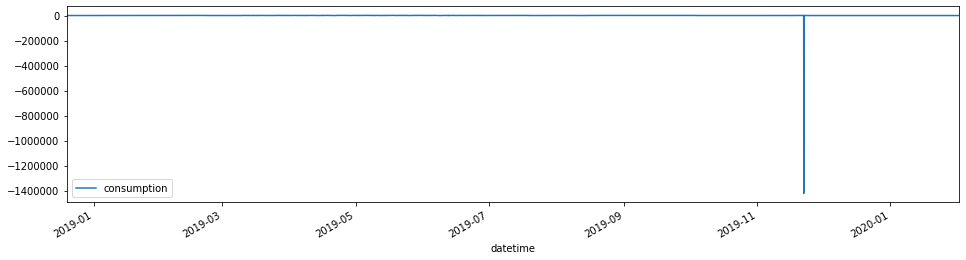

In [39]:
df.plot(figsize=(16,4),legend=True)
plt.show()